### -- This notes are from analyticsvidhya.com ![alt text](https://)

## Introduction to Time Series
- Time Series is generally data which is collected over time and is dependent on it.
- Not every data collected with respect to time represents a time series.

        Methods of prediction & forecasting, time based data is Time Series Modeling


### Example of time series: 

    - Stock Market Price
    - Passenger Count of an airlines
    - Temperature over time 

### Components of a Time Series:
1. `Trend`: Trend is a general direction in which something is developing or changing. 
2. `Seasonality`: Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality.


#### Difference between time series and regression
- The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.

**Note** 

    - Predicting a time series using regression techniques is not a good approach.
    - Time series forecasting is the use of a model to predict future values based on previously observed values.


## Understanding the Problem Statements and Datasets
### Problem Statement
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

You can get the dataset here https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

### Table of Contents

a) Understanding Data:

    1) Hypothesis Generation
    2) Getting the system ready and loading the data
    3) Dataset Structure and Content
    4) Feature Extraction
    5) Exploratory Analysis

b) Forecasting using Multiple Modeling Techniques:

    1) Splitting the data into training and validation part
    2) Modeling techniques
    3) Holt’s Linear Trend Model on daily time series
    4) Holt Winter’s Model on daily time series
    5) Introduction to ARIMA model
    6) Parameter tuning for ARIMA model
    7) SARIMAX model on daily time series

## a) Understanding Data

### 1) Hypothesis Generation
Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

- There will be an increase in the traffic as the years pass by.

`Explanation` - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.


- The traffic will be high from May to October.

`Explanation` - Tourist visits generally increases during this time perion.

- Traffic on weekdays will be more as compared to weekends/holidays.

`Explanation` - People will go to office on weekdays and hence the traffic will be more

- Traffic during the peak hours will be high.
'Explanation` - People will travel to work, college.




### 2) Getting the system ready and loading the data

In [1]:
## Load the dataset
# Load the data
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv
Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [0]:
##
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [0]:
##
train=pd.read_csv("Train.csv") 
test=pd.read_csv("Test.csv")

train_original=train.copy() 
test_original=test.copy()

### 3) Dataset Structure and Content

In [67]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [68]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


(None, None)

In [69]:
## Shape
train.shape, test.shape

((18288, 3), (5112, 2))

### 4) Feature Extraction

In [0]:
## column "Datetime" need to be change to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 


In [71]:
## check 
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        5112 non-null   int64         
 1   Datetime  5112 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


(None, None)

In [72]:
### Insight for 2) Hypothesis
for i in (train, test, train_original, test_original):
    i['year'] = i['Datetime'].dt.year 
    i['month'] = i['Datetime'].dt.month 
    i['day'] = i['Datetime'].dt.day
    i['Hour'] = i['Datetime'].dt.hour 
    
## check
train_original.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [0]:
###
train['day of week'] = train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [74]:
## Assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 

train['weekend'] = train['Datetime'].apply(applyer) 

## check
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [0]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 

In [76]:
# df['Count'] # Count is the passenger count corresponding to each Datetime.
ts = df['Count'] 
print(ts[:10])
print(type(ts))

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
Name: Count, dtype: int64
<class 'pandas.core.series.Series'>


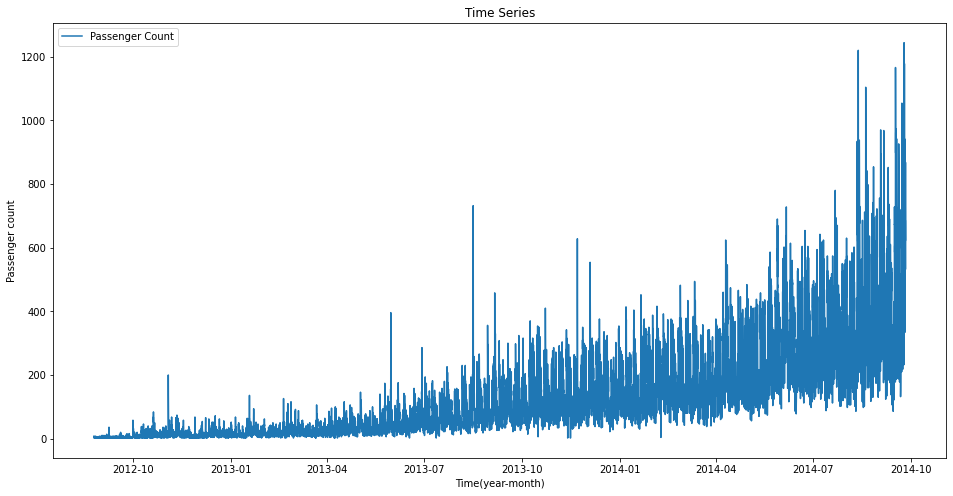

In [77]:

plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

## Note: Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time

### 5) Exploratory Data Analysis

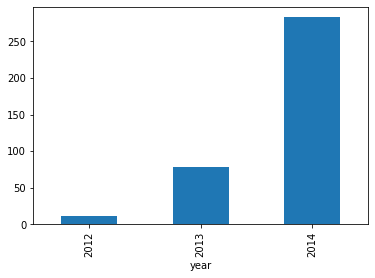

In [78]:
## Our first hypothesis was traffic will increase as the years pass by
train.groupby('year')['Count'].mean().plot.bar()

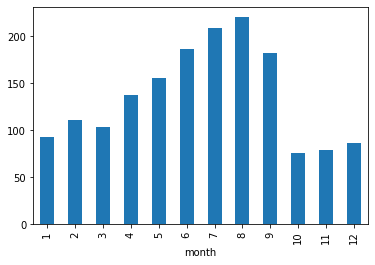

In [79]:
## Our second hypothesis was about increase in traffic from May to October
train.groupby('month')['Count'].mean().plot.bar()

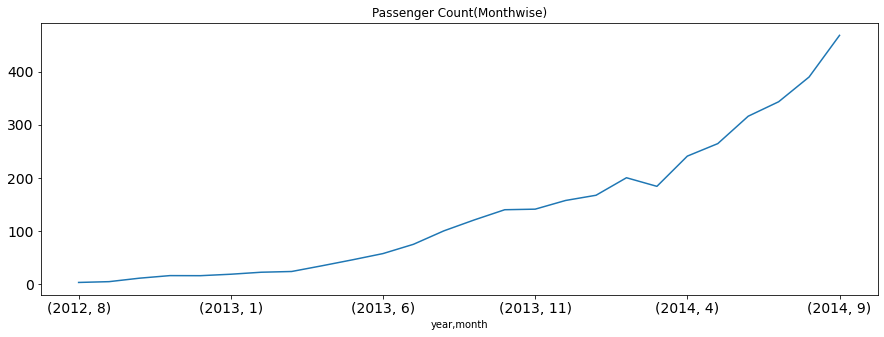

In [80]:
## monthly mean of each year separately
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

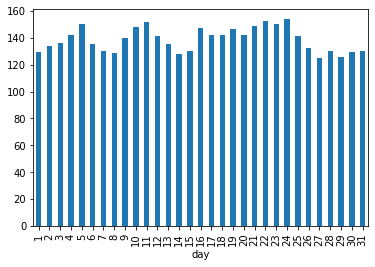

In [81]:
## daily mean of passenger count.
train.groupby('day')['Count'].mean().plot.bar()

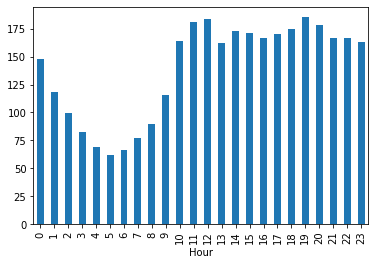

In [82]:
### also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.
train.groupby('Hour')['Count'].mean().plot.bar()

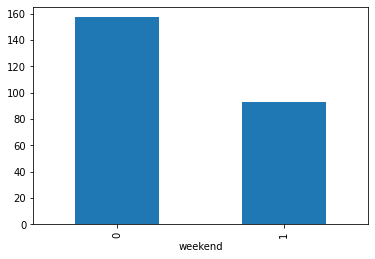

In [83]:
### validate our hypothesis in which we assumed that the traffic will be more on weekdays.
train.groupby('weekend')['Count'].mean().plot.bar()

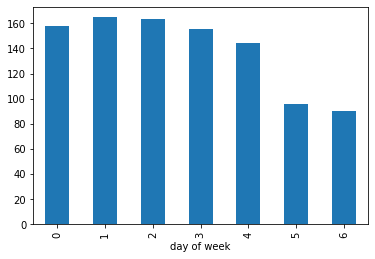

In [84]:
## Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.
train.groupby('day of week')['Count'].mean().plot.bar()

In [85]:
## 
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [0]:
### drop the ID variable 
train = train.drop('ID', axis = 1)

In [87]:
train['Timestamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M') 
train.index = train['Timestamp']

## check
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Timestamp,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,2012-08-25 00:00:00
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,2012-08-25 01:00:00
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2012-08-25 02:00:00
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,2012-08-25 03:00:00
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,2012-08-25 04:00:00


In [0]:
##
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()
# monthly

In [0]:
# hourly['Count']

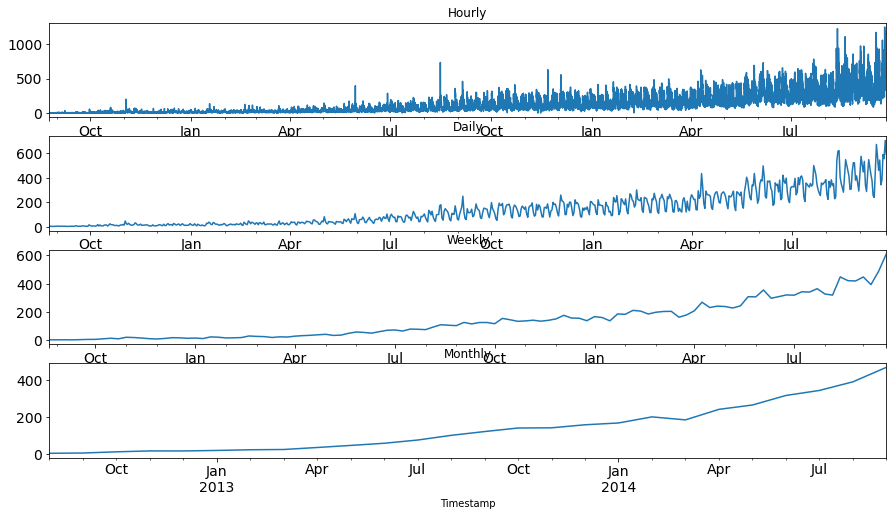

In [90]:
fig, axs = plt.subplots(4,1) 
hourly['Count'].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily['Count'].plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly['Count'].plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly['Count'].plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [91]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Timestamp,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,2012-08-25 00:00:00
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,2012-08-25 01:00:00
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2012-08-25 02:00:00
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,2012-08-25 03:00:00
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,2012-08-25 04:00:00


In [92]:
### we will work on the daily time series.
test['Timestamp'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M') 
test.index = test['Timestamp']  

# Converting to daily mean 
test = test.resample('D').mean() 

train['Timestamp'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train['Timestamp']

# Converting to daily mean 
train = train.resample('D').mean()
train.head()

,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [93]:
test.head()

,ID,year,month,day,Hour
Timestamp,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


## b) Forecasting using Multiple Modeling Techniques:

### 1) Splitting the train data into training and validation part
To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [0]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

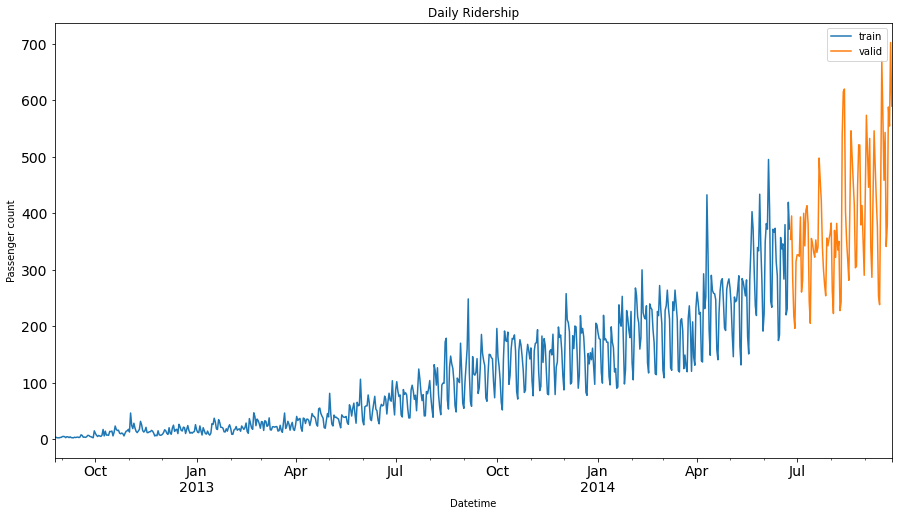

In [95]:
Train['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

### 2) Modeling Techniques
    i) Naive Approach
    ii) Moving Average
    iii) Simple Exponential Smoothing
    iv) Holt’s Linear Trend Model



#### i) Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

372.1666666666667


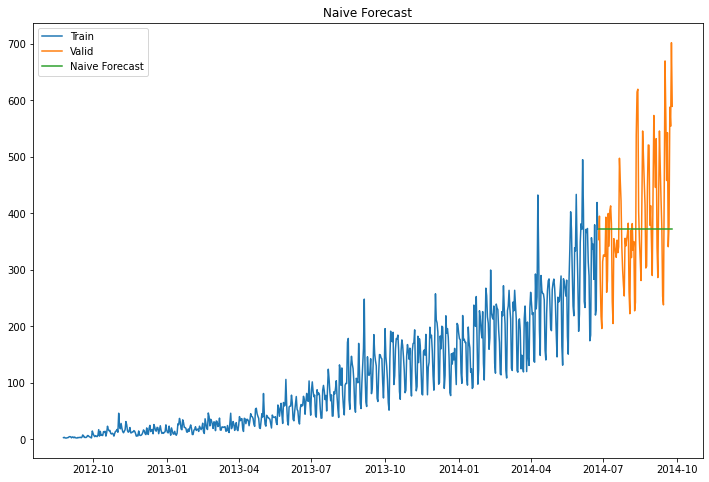

In [96]:
dd = np.asarray(Train['Count'])
y_hat = valid.copy() 

print(dd[len(dd) - 1])
y_hat['naive'] = dd[len(dd)-1] 


plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index, valid['Count'], label='Valid') 
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [97]:
### calculate RMSE to check the accuracy of our model on validation data set.

from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


### ii) Moving Average
In this technique we will take the average of the passenger counts for last few time periods only.

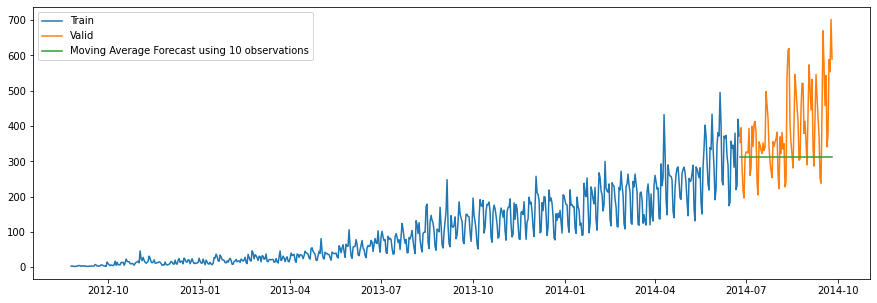

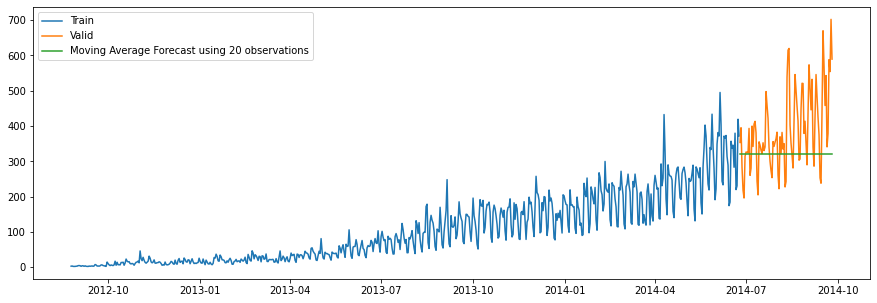

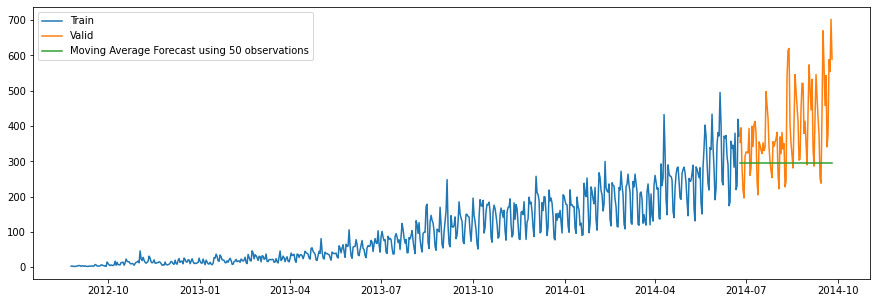

In [98]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [99]:
rms = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_avg_forecast'])) 
print(rms)

144.19175679986802


#### iii) Simple Exponential Smoothing
- In this technique, we assign larger weights to more recent observations than to observations from the distant past.
- The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

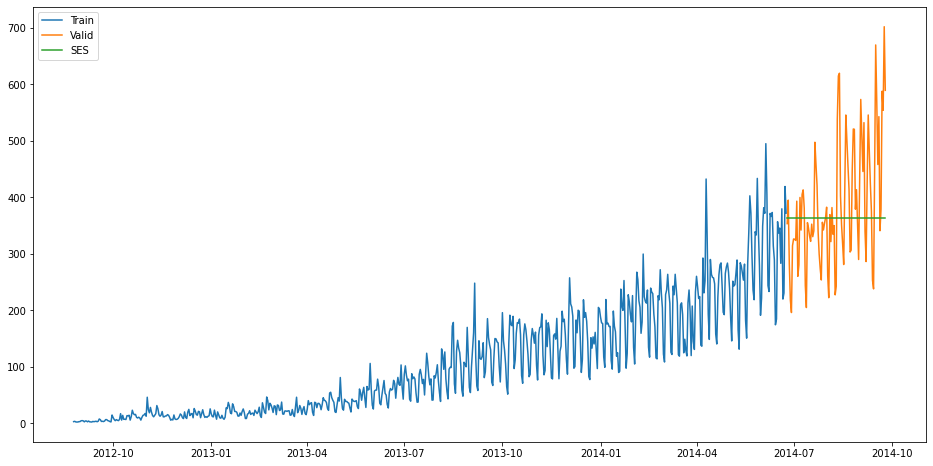

In [100]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [101]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


#### iv) Holt’s Linear Trend Model

- It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
- This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

We can decompose the time series in four parts.

    - `Observed`, which is the original time series.
    - `Trend`, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
    - `Seasonal`, which tells us about the seasonality in the time series.
    - `Residual`, which is obtained by removing any trend or seasonality in the time series.



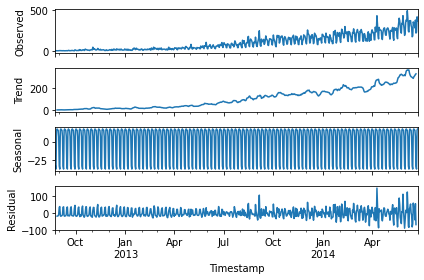

In [102]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

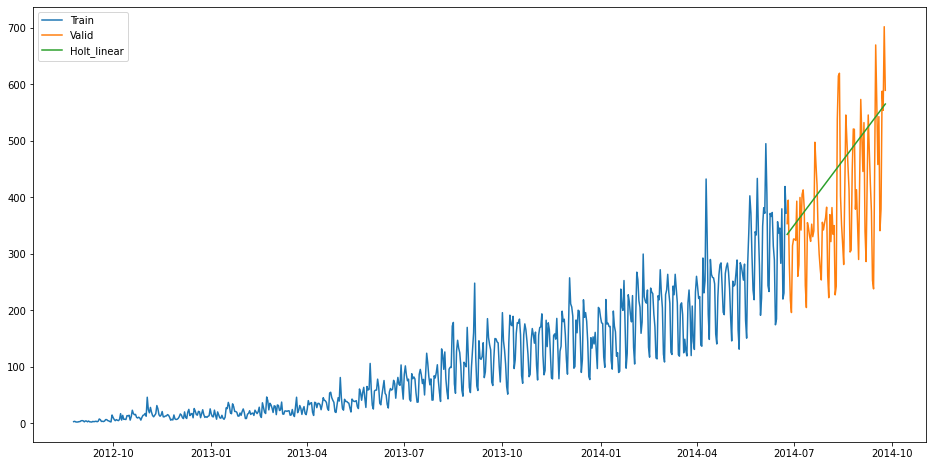

In [103]:
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

In [104]:
### calculate the rmse of the model.

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

112.94278345314041


## 3) Holt’s Linear Trend Model on daily time series
- Now let’s try to make holt’s linear trend model on the daily time series and make predictions on the test dataset.
- We will make predictions based on the daily time series and then will distribute that daily prediction to hourly predictions.
- We have fitted the holt’s linear trend model on the train dataset and validated it using validation dataset.

In [0]:
## Load the submission file
submission = pd.read_csv("submission.csv")

In [0]:
## prediction on test data
predict = fit1.forecast(len(test))
# predict

In [107]:
## Let's save these prediction in new column in test
test['prediction'] = predict
test.head()

,ID,year,month,day,Hour,prediction
Timestamp,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,334.650767
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,337.159011
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,339.667256
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,342.175500
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,344.683745


In [0]:
## convert these predictions to hourly basis

# Calculating the hourly ratio of count 
train_original['ratio'] = train_original['Count']/train_original['Count'].sum() 

# Grouping the hourly ratio 
temp = train_original.groupby(['Hour'])['ratio'].sum() 

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [109]:
temp2 = pd.read_csv("GROUPby.csv") 
temp2.head()

,Hour,Hour.1,ratio
0,0,NaN,0.044287
1,1,NaN,0.035343
2,2,NaN,0.029911
3,3,NaN,0.024714
4,4,NaN,0.020802


In [110]:
temp2 = temp2.drop('Hour.1', 1) 
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [111]:
# Merge Test and test_original on day, month and year 
merge = pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4


In [112]:
merge['Hour']=merge['Hour_y'] 
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y,Hour
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4,4


In [113]:
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,334.650767,18288,0
1,18299.5,26.0,334.650767,18289,1
2,18299.5,26.0,334.650767,18290,2
3,18299.5,26.0,334.650767,18291,3
4,18299.5,26.0,334.650767,18292,4


In [114]:
# Predicting by merging merge and temp2 
prediction = pd.merge(merge, temp2, on='Hour', how='left') 
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [0]:
# Converting the ratio to the original scale 
prediction['Count'] = prediction['prediction']
prediction['ID'] = prediction['ID_y']

In [0]:
## Let’s drop all other features from the submission file and keep ID and Count only.

submission = prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'], axis=1) 
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv')

In [117]:
## check
df_check = pd.read_csv("Holt linear.csv")
df_check.head()

,Unnamed: 0,ID,Count
0,0,18288,334.650767
1,1,18289,334.650767
2,2,18290,334.650767
3,3,18291,334.650767
4,4,18292,334.650767


### 4) Holt winter’s model on daily time series

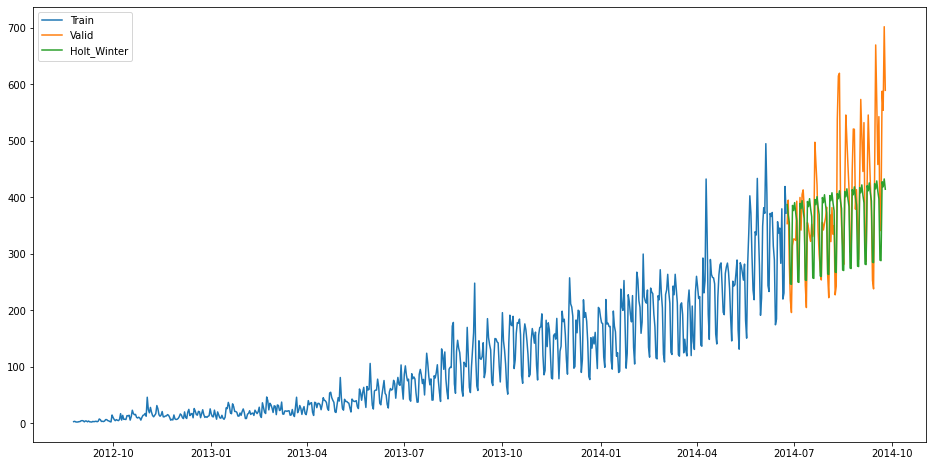

In [118]:
y_hat_avg = valid.copy() 
fit1 = ExponentialSmoothing(np.asarray(Train['Count']), seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [119]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 
print(rms)

82.37571191747172


In [0]:
test['prediction'] = predict

In [0]:
# Merge Test and test_original on day, month and year 
merge = pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour'] = merge['Hour_y'] 
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [0]:
# Predicting by merging merge and temp2 
prediction = pd.merge(merge, temp2, on='Hour', how='left') 

In [0]:
# Converting the ratio to the original scale 
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

# Let’s drop all features other than ID and Count
prediction['ID'] = prediction['ID_y'] 
submission = prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'], axis=1) 

In [0]:
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt winters.csv')

- Holt winters model produced rmse of 328.356 on the leaderboard.
- The possible reason behind this may be that this model was not that good in predicting the trend of the time series but worked really well on the seasonality part.

Till now we have made different models for trend and seasonality. Can’t we make a model which will consider both the trend and seasonality of the time series?

### 5) Introduction to ARIMA model
ARIMA stands for Auto Regression Integrated Moving Average. It is specified by three ordered parameters (p,d,q).

- Here `p` is the order of the autoregressive model(number of time lags)
- `d` is the degree of differencing(number of times the data have had past values subtracted)
- `q` is the order of moving average model. We will discuss more about these parameters in next section.

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation.

**What is a `stationary time series`?** <br>
There are three basic criterion for a series to be classified as stationary series :
- The mean of the time series should not be a function of time. It should be constant.
- The variance of the time series should not be a function of time.
- The covariance of the ith term and the (i+m)th term should not be a function of time.
<br>

**Why do we have to make the time series stationary?** <br>
We make the series stationary **to make the variables independent**. Variables can be dependent in various ways, but can only be independent in one way. So, we will get more information when they are independent. Hence the time series must be stationary.

--> If the time series is not stationary, firstly we have to make it stationary. For doing so, we need to remove the trend and seasonality from the data. 

To learn more about stationarity you can refer this article: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

### 6) Parameter tuning for ARIMA model
First of all we have to make sure that the time series is stationary. If the series is not stationary, we will make it stationary.

`Stationarity Check`<br>
- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.
- The null hypothesis of the test is that time series is not stationary (has some time-dependent structure).
- The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

We interpret this result using the Test Statistics and critical value. If the Test Statistics is smaller than critical value, it suggests we reject the null hypothesis (stationary), otherwise a greater Test Statistics suggests we accept the null hypothesis (non-stationary).




In [0]:
from statsmodels.tsa.stattools import adfuller 

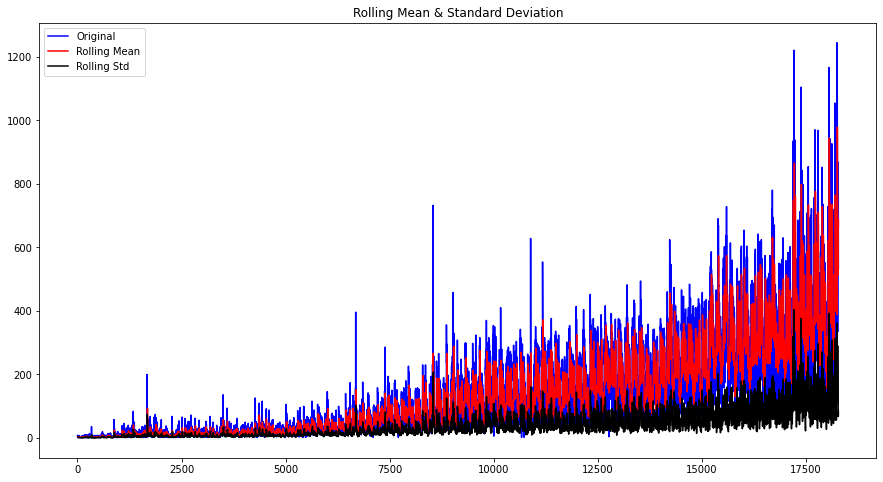

Results of Dickey-Fuller Test:
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [129]:

def test_stationarity(timeseries):
    #Determing rolling statistics
    # rolmean = ts_log.rolling_mean(timeseries, window=24) # 24 hours on each day
    # rolstd = ts_log.rolling_std(timeseries, window=24)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,8
test_stationarity(train_original['Count'])


-- The statistics shows that the time series is stationary as Test Statistic < Critical value but we can see an increasing trend in the data. So, firstly we will try to make the data more stationary. For doing so, we need to remove the trend and seasonality from the data.

### Removing Trend
- A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

- We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

- We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

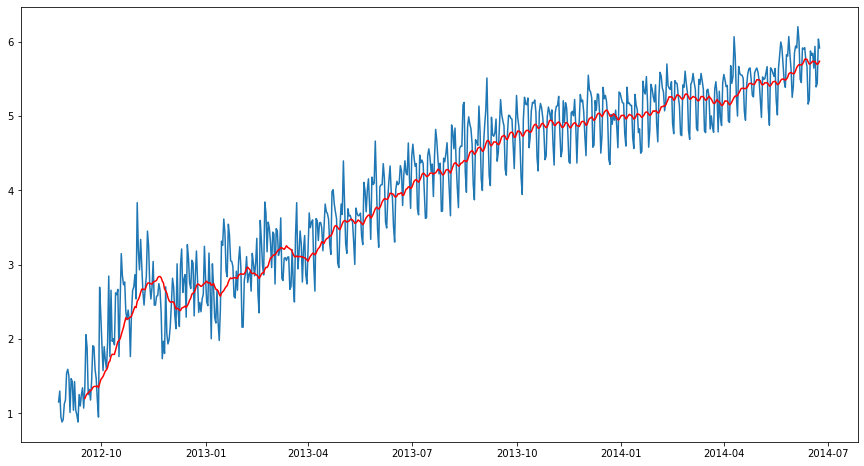

In [131]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = pd.Series(Train_log).rolling(window=24).mean()
# moving_avg = pd.rolling_mean(Train_log, 24) 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [0]:
## So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.

train_log_moving_avg_diff = Train_log - moving_avg

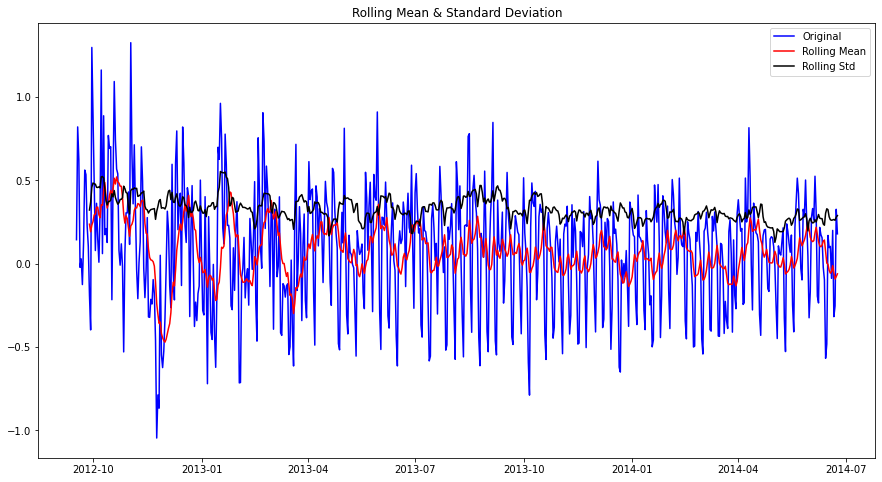

Results of Dickey-Fuller Test:
Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [134]:
## Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.

train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

We can see that the Test Statistic is very smaller as compared to the Critical Value. So, we can be confident that the trend is almost removed.

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

- Differencing can help to make the series stable and eliminate the trend.

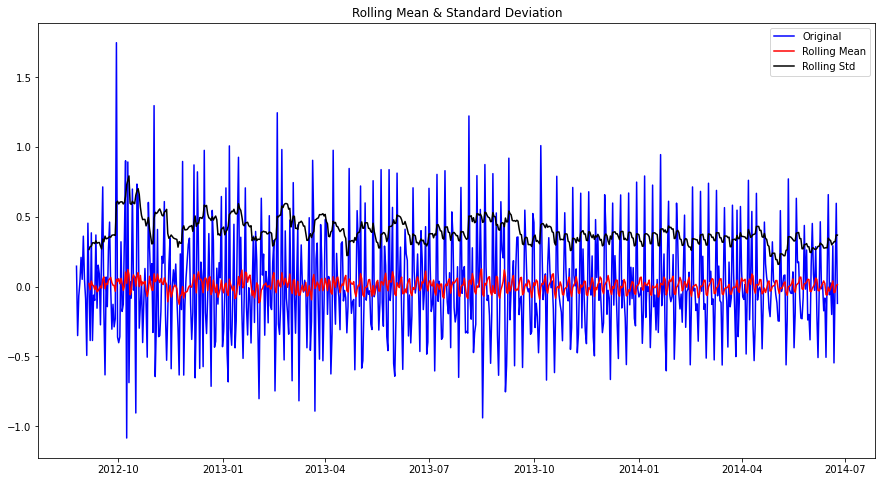

Results of Dickey-Fuller Test:
Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


In [135]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

### Removing Seasonality
- By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
- Seasonality is always of a fixed and known period.
- We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

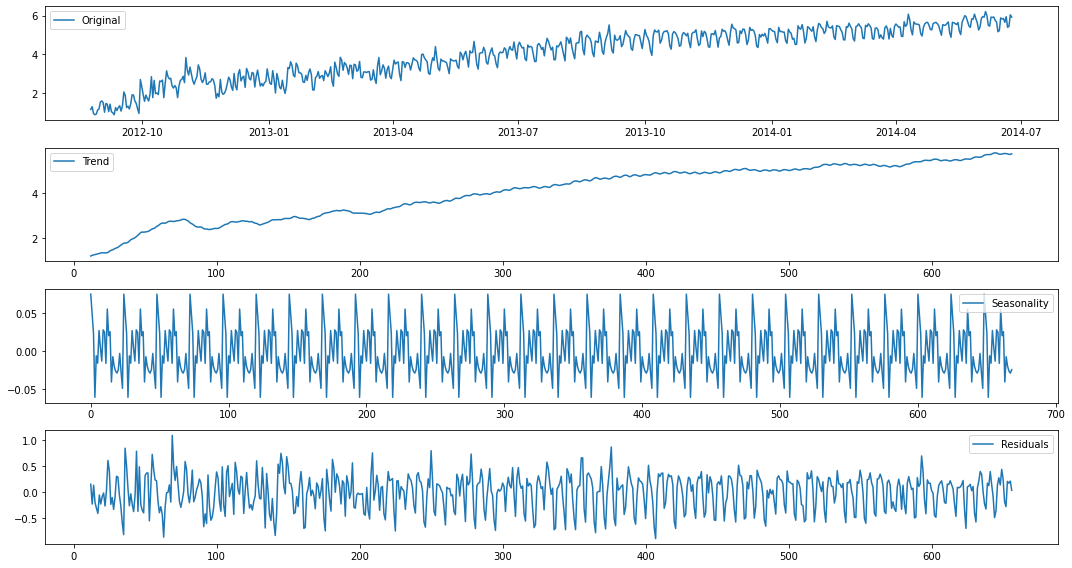

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

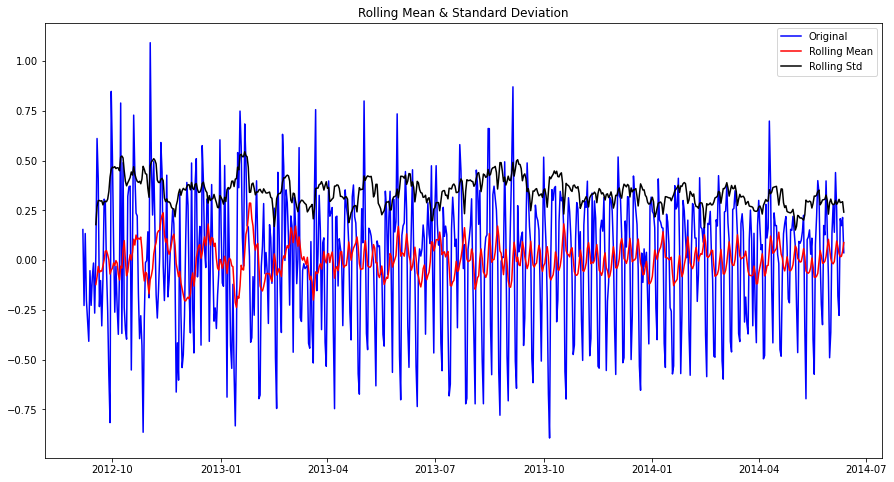

Results of Dickey-Fuller Test:
Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


In [138]:
## Let’s check stationarity of residuals.

train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

It can be interpreted from the results that the residuals are stationary.

Now we will forecast the time series using different models.





### Forecasting the time series using ARIMA
- First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

- To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

- ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

- PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.

In [139]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


#### ACF and PACF plot

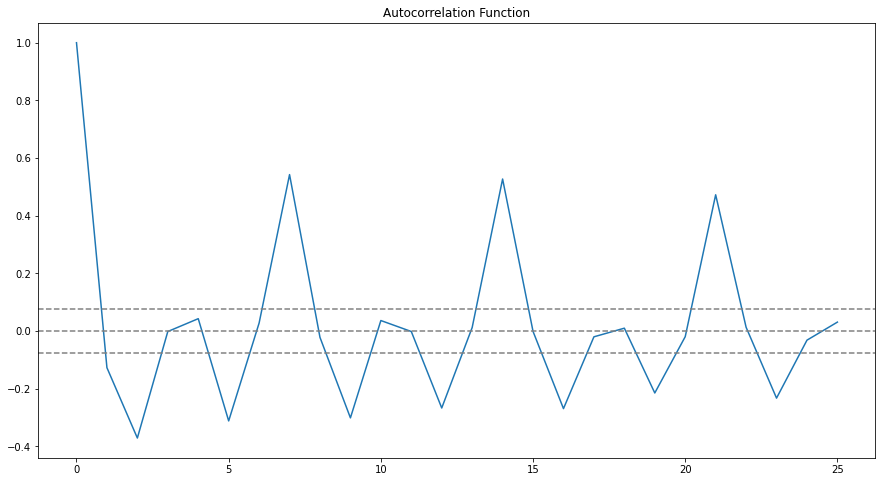

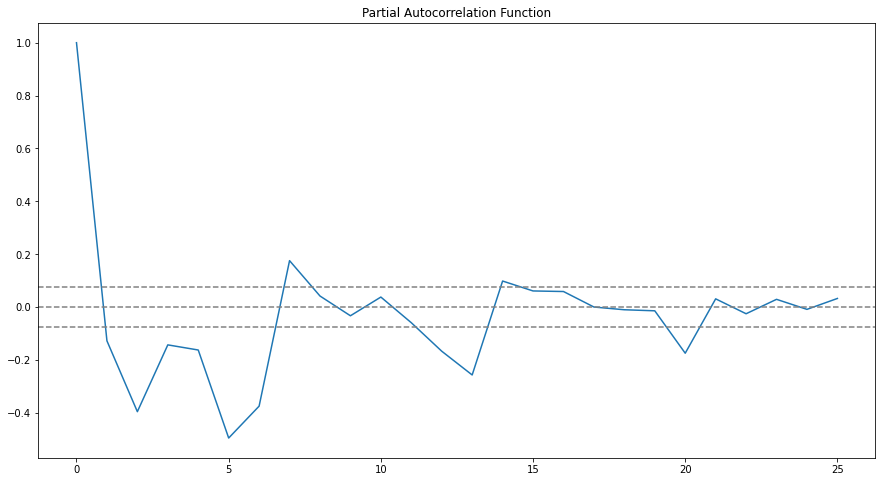

In [140]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

- p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
- q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

- Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

### AR model
The autoregressive model specifies that the output variable depends linearly on its own previous values.

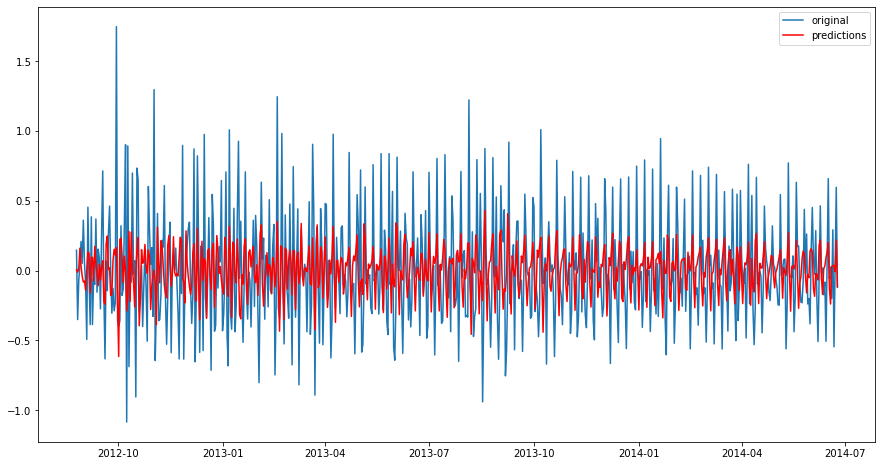

In [141]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

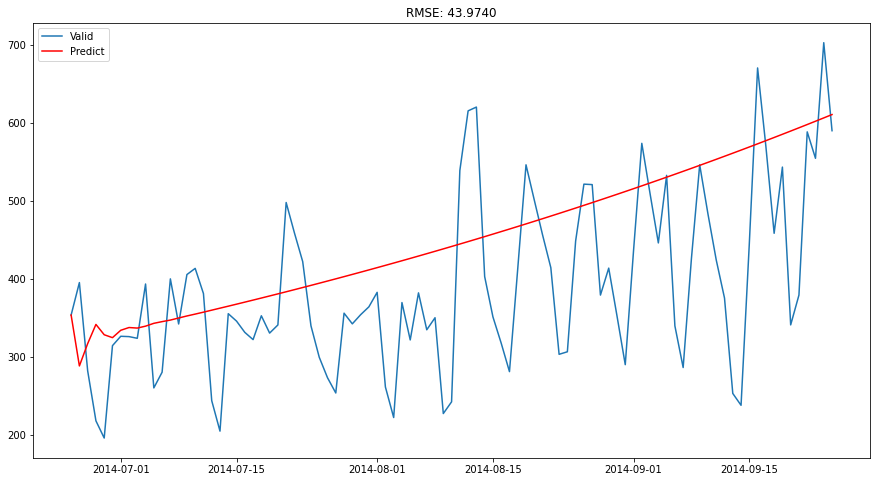

In [143]:
# Lets plot the validation curve for AR model.

# We have to change the scale of the model to the original scale.

# First step would be to store the predicted results as a separate series and observe it.


AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

Here the red line shows the prediction for the validation set. Let’s build the MA model now.

### MA model
The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

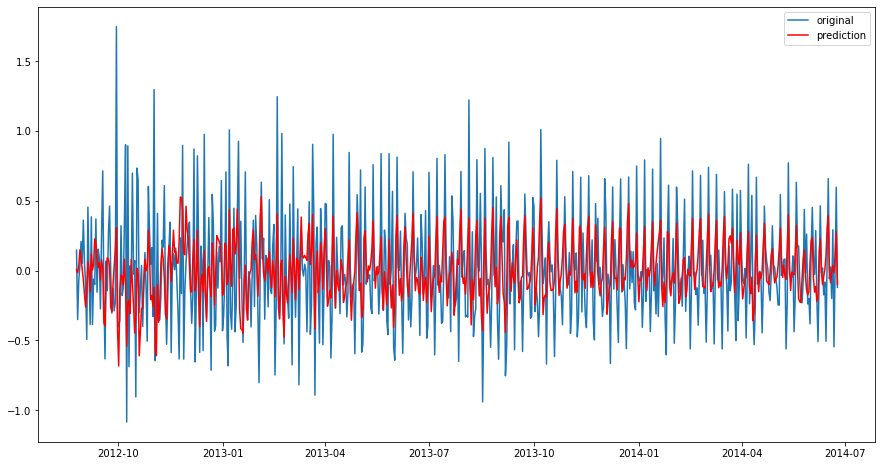

In [144]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

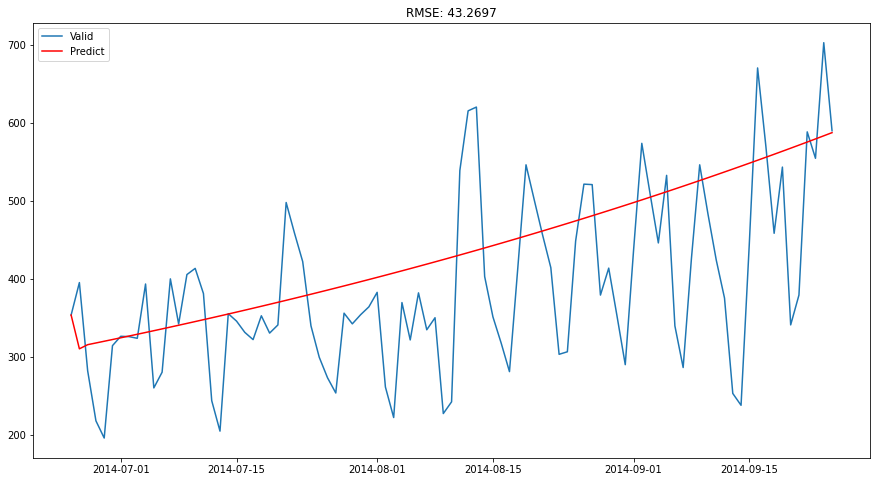

In [145]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0])) 
plt.show()

Now let’s combine these two models.

### Combined model

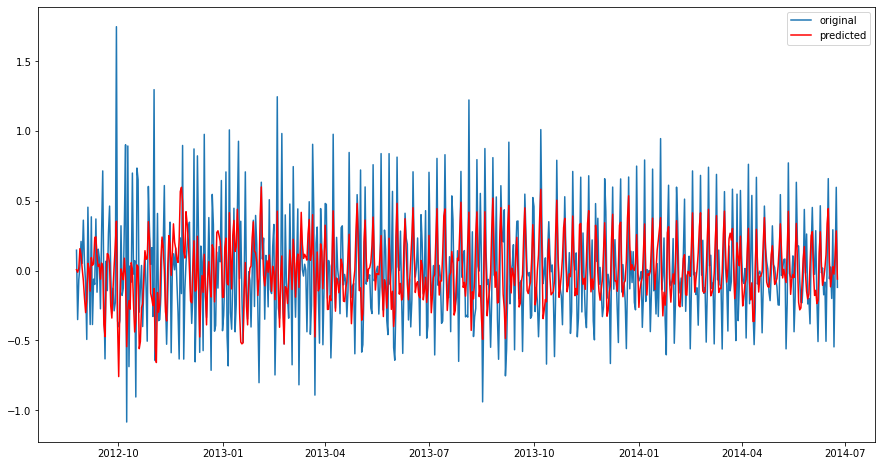

In [146]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [0]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

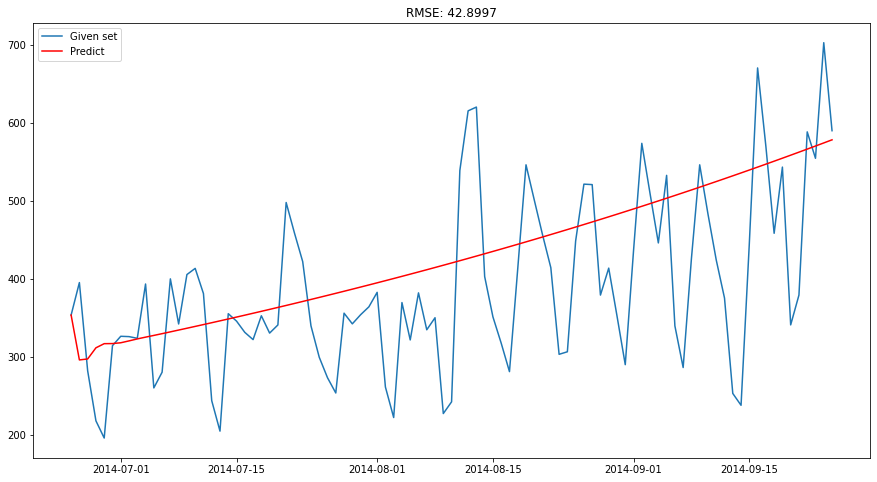

In [148]:
## Let’s predict the values for validation set.

ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff, valid)